In [15]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [16]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10384812457322268406, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 13115079279753435071
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 17578585188219684516
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14800692839
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5934618651688996880
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [17]:
!cat /proc/meminfo

MemTotal:       13335276 kB
MemFree:         9671828 kB
MemAvailable:   11817528 kB
Buffers:           71900 kB
Cached:          2108888 kB
SwapCached:            0 kB
Active:          1225112 kB
Inactive:        2039092 kB
Active(anon):     927032 kB
Inactive(anon):    10592 kB
Active(file):     298080 kB
Inactive(file):  2028500 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               344 kB
Writeback:             0 kB
AnonPages:       1083548 kB
Mapped:           546476 kB
Shmem:             11144 kB
Slab:             161268 kB
SReclaimable:     120388 kB
SUnreclaim:        40880 kB
KernelStack:        4404 kB
PageTables:         7828 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6667636 kB
Committed_AS:    2832560 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:         0 kB
ShmemHugePages:  

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving T_tr.csv to T_tr.csv
Saving T_ts.csv to T_ts.csv
Saving X_t.csv to X_t.csv
Saving X_tr.csv to X_tr.csv


In [4]:
X_tr = pd.read_csv("X_tr.csv")
X_ts = pd.read_csv("X_t.csv")
T_ts = pd.read_csv("T_ts.csv")
T_tr =  pd.read_csv("T_tr.csv")

X_tr.shape, T_tr.shape, X_ts.shape, T_ts.shape

((22621, 17), (22621, 1), (7541, 17), (7541, 1))

In [0]:
X_train, T_train, X_test, T_test = X_tr.values, T_tr.values, X_ts.values, T_ts.values

In [6]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(categories='auto',sparse=False)
labels = onehot_encoder.fit_transform(T_tr)
labels_test = onehot_encoder.fit_transform(T_ts)

labels.shape, labels_test.shape

((22621, 2), (7541, 2))

In [0]:
def normalize(X):
    mean = X.mean()  #this will compute mean of every column of the dataset
    std = X.std()    #computes the standard deviation 
    return (X - mean) / std

In [0]:
X_train_normalized = normalize(X_tr)
X_test_normalized = normalize(X_ts)

In [9]:
#Necessary Imports
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from sklearn.metrics import classification_report,accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef, confusion_matrix, roc_curve, auc


#Define model1
def model1():
    model1 = Sequential()

    #input layer with no. of features as input_dim and 'relu' as activation function and 0.5 dropout
    model1.add(Dense(64, activation='sigmoid', input_dim=X_train_normalized.shape[1]))
    model1.add(Dropout(0.5))

    #adding 5 hidden layers with different number of neurons
    model1.add(Dense(64, activation='relu'))
    model1.add(Dropout(0.5))

    model1.add(Dense(32,activation='exponential'))
    model1.add(Dropout(0.6))

    model1.add(Dense(10,activation='tanh'))

    model1.add(Dense(128,activation='sigmoid'))
    model1.add(Dropout(0.1))

    model1.add(Dense(128,activation='hard_sigmoid'))
    model1.add(Dropout(0.5))

    #Output layer with softmax activation and 2 neurons as we have 2 classes
    model1.add(Dense(2, activation='softmax'))

    #Choice of optimizer : rmsprop
    rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    model1.compile(loss='categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy'])

    #fitting the model
    history = model1.fit(X_train_normalized, labels, epochs=20, batch_size=512, verbose=1)

    #Model Evaluation
    score = model1.evaluate(X_test_normalized, labels_test, batch_size=512)

    #Plotting epoch Vs Accuracy
    plt.plot(history.history['acc'])
    plt.title("Model 1 Accuracy", fontsize = 18)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

    #Plotting epoch Vs Loss
    plt.plot(history.history['loss'])
    plt.title('Model 1 loss', fontsize = 18)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()


    #Predict the values for test set
    y_pred = model1.predict_classes(X_test_normalized)

    #print the classification report
    print("\n Classification Report \n \n",classification_report(T_test,y_pred))

    #print confusion matrix
    print("\n Confusion Matrix \n",confusion_matrix(T_test,y_pred))
    print("\n Accuracy:", round((accuracy_score(T_test,y_pred)*100),2), "%")
    print("\n F1 Score: ",round(f1_score(T_test,y_pred, average="macro"),3))
    print("\n Precision: ",round(precision_score(T_test,y_pred, average="macro"),3))
    print("\n Recall: ",round(recall_score(T_test,y_pred, average="macro"),3))
    print("\n MCC:", round(matthews_corrcoef(T_test,y_pred),3))

Using TensorFlow backend.


In [0]:
#Record training times for GPUs
training_time_gpu = []

Epoch 1/20
22621/22621 [==============================] - 2s 69us/step - loss: 0.6221 - acc: 0.7203
Epoch 2/20
22621/22621 [==============================] - 0s 10us/step - loss: 0.5693 - acc: 0.7492
Epoch 3/20
22621/22621 [==============================] - 0s 10us/step - loss: 0.5326 - acc: 0.7533
Epoch 4/20
22621/22621 [==============================] - 0s 10us/step - loss: 0.4954 - acc: 0.7651
Epoch 5/20
22621/22621 [==============================] - 0s 10us/step - loss: 0.4766 - acc: 0.7682
Epoch 6/20
22621/22621 [==============================] - 0s 10us/step - loss: 0.4700 - acc: 0.7739
Epoch 7/20
22621/22621 [==============================] - 0s 10us/step - loss: 0.4569 - acc: 0.7770
Epoch 8/20
22621/22621 [==============================] - 0s 10us/step - loss: 0.4527 - acc: 0.7828
Epoch 9/20
22621/22621 [==============================] - 0s 10us/step - loss: 0.4468 - acc: 0.7881
Epoch 10/20
22621/22621 [==============================] - 0s 10us/step - loss: 0.4391 - acc: 0.7947

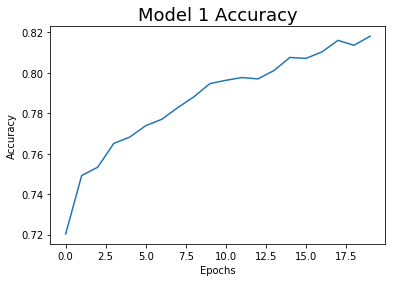

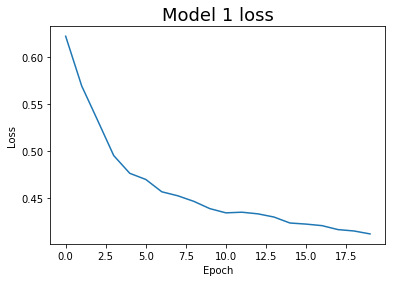


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.82      0.96      0.89      5618
           1       0.78      0.40      0.53      1923

   micro avg       0.82      0.82      0.82      7541
   macro avg       0.80      0.68      0.71      7541
weighted avg       0.81      0.82      0.80      7541


 Confusion Matrix 
 [[5401  217]
 [1157  766]]

 Accuracy: 81.78 %

 F1 Score:  0.707

 Precision:  0.801

 Recall:  0.68

 MCC: 0.466
Time taken by Model 1 :  8.595637798309326 seconds


In [23]:
import time
start = time.time()
model1()
end = time.time()
print("Time taken by Model 1 : ",(end - start),"seconds")
training_time_gpu.append((end - start))

In [0]:
#Define model2
def model2():
    model2 = Sequential()

    #input layer with no. of features as input_dim and 'relu' as activation function 
    model2.add(Dense(64, activation='selu', input_dim=X_train_normalized.shape[1]))

    #adding 6 hidden layers with 64 and 32 neurons alternatively
    model2.add(Dense(32, activation='relu'))

    model2.add(Dense(64,activation='selu'))

    model2.add(Dense(32,activation='relu'))

    model2.add(Dense(64,activation='selu'))

    model2.add(Dense(32,activation='relu'))

    model2.add(Dense(64,activation='selu'))

    #Output layer with softmax activation and 2 neurons as we have 2 classes
    model2.add(Dense(2, activation='softmax'))

    #Choice of optimizer : rmsprop
    rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    model2.compile(loss='binary_crossentropy', optimizer= rmsprop, metrics=['accuracy'])

    #fitting the model
    history = model2.fit(X_train_normalized, labels, epochs=20, batch_size=512, verbose=1)

    #Model Evaluation
    score_2 = model2.evaluate(X_test_normalized, labels_test, batch_size=512)

    #Plotting epoch Vs Accuracy
    plt.plot(history.history['acc'])
    plt.title("Model 2 Accuracy", fontsize = 18)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

    #Plotting epoch Vs Loss
    plt.plot(history.history['loss'])
    plt.title('Model 2 loss', fontsize = 18)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

    #Predict the values for test set
    y_pred_2 = model2.predict_classes(X_test_normalized)

    #print the classification report
    print("\n Classification Report \n \n",classification_report(T_test,y_pred_2))

    #print confusion matrix
    print("\n Confusion Matrix \n",confusion_matrix(T_test,y_pred_2))
    print("\n Accuracy:", round((accuracy_score(T_test,y_pred_2)*100),2), "%")
    print("\n F1 Score: ",round(f1_score(T_test,y_pred_2, average="macro"),3))
    print("\n Precision: ",round(precision_score(T_test,y_pred_2, average="macro"),3))
    print("\n Recall: ",round(recall_score(T_test,y_pred_2, average="macro"),3))
    print("\n MCC:", round(matthews_corrcoef(T_test,y_pred_2),3))

Epoch 1/20
22621/22621 [==============================] - 2s 74us/step - loss: 0.4098 - acc: 0.8084
Epoch 2/20
22621/22621 [==============================] - 0s 11us/step - loss: 0.3659 - acc: 0.8356
Epoch 3/20
22621/22621 [==============================] - 0s 10us/step - loss: 0.3582 - acc: 0.8401
Epoch 4/20
22621/22621 [==============================] - 0s 10us/step - loss: 0.3513 - acc: 0.8425
Epoch 5/20
22621/22621 [==============================] - 0s 10us/step - loss: 0.3492 - acc: 0.8438
Epoch 6/20
22621/22621 [==============================] - 0s 11us/step - loss: 0.3461 - acc: 0.8442
Epoch 7/20
22621/22621 [==============================] - 0s 10us/step - loss: 0.3450 - acc: 0.8463
Epoch 8/20
22621/22621 [==============================] - 0s 10us/step - loss: 0.3429 - acc: 0.8452
Epoch 9/20
22621/22621 [==============================] - 0s 10us/step - loss: 0.3430 - acc: 0.8462
Epoch 10/20
22621/22621 [==============================] - 0s 10us/step - loss: 0.3405 - acc: 0.8478

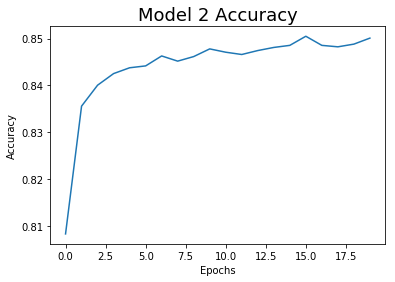

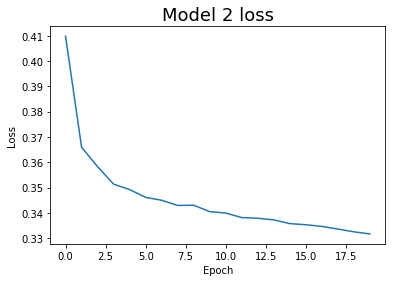


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      5618
           1       0.79      0.49      0.60      1923

   micro avg       0.84      0.84      0.84      7541
   macro avg       0.82      0.72      0.75      7541
weighted avg       0.83      0.84      0.82      7541


 Confusion Matrix 
 [[5370  248]
 [ 990  933]]

 Accuracy: 83.58 %

 F1 Score:  0.749

 Precision:  0.817

 Recall:  0.721

 MCC: 0.529
Time taken by Model 2 :  8.472150564193726 seconds


In [24]:
start = time.time()
model2()
end = time.time()
print("Time taken by Model 2 : ",(end - start),"seconds")
training_time_gpu.append((end - start))

In [0]:
#Define model3
def model3():
    model3 = Sequential()

    #input layer with no. of features as input_dim and 'relu' as activation function and 0.5 dropout
    model3.add(Dense(X_train_normalized.shape[1], activation='relu', input_dim=X_train_normalized.shape[1]))

    #adding 10 hidden layers 
    model3.add(Dense(24, activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(10,activation='selu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(1,activation='selu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(48, activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(20, activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(128, activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(64, activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(32,activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(10,activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(64,activation='selu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(10,activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(1,activation='selu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(256,activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(512,activation='elu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(1024,activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(256,activation='selu'))
    model3.add(Dropout(0.1))

    #Output layer with softmax activation and 2 neurons as we have 2 classes
    model3.add(Dense(2, activation='softmax'))

    #Choice of optimizer : rmsprop
    rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    model3.compile(loss='categorical_crossentropy', optimizer= rmsprop, metrics=['accuracy'])

    #fitting the model
    history = model3.fit(X_train_normalized, labels, epochs=20, batch_size=512, verbose=1)

    #Model Evaluation
    score_3 = model3.evaluate(X_test_normalized, labels_test, batch_size=512)

    #Plotting epoch Vs Accuracy
    plt.plot(history.history['acc'])
    plt.title("Model 3 Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

    #Plotting epoch Vs Loss
    plt.plot(history.history['loss'])
    plt.title('Model 3 loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()


    #Predict the values for test set
    y_pred_3 = model3.predict_classes(X_test_normalized)

    #print the classification report
    print("\n Classification Report \n \n",classification_report(T_test,y_pred_3))

    #print confusion matrix
    print("\n Confusion Matrix \n",confusion_matrix(T_test,y_pred_3))
    print("\n Accuracy:", round((accuracy_score(T_test,y_pred_3)*100),2), "%")
    print("\n F1 Score: ",round(f1_score(T_test,y_pred_3, average="macro"),3))
    print("\n Precision: ",round(precision_score(T_test,y_pred_3, average="macro"),3))
    print("\n Recall: ",round(recall_score(T_test,y_pred_3, average="macro"),3))
    print("\n MCC:", round(matthews_corrcoef(T_test,y_pred_3),3))

Epoch 1/20
22621/22621 [==============================] - 3s 118us/step - loss: 0.5822 - acc: 0.7458
Epoch 2/20
22621/22621 [==============================] - 0s 19us/step - loss: 0.5193 - acc: 0.7619
Epoch 3/20
22621/22621 [==============================] - 0s 20us/step - loss: 0.4823 - acc: 0.7814
Epoch 4/20
22621/22621 [==============================] - 0s 19us/step - loss: 0.4644 - acc: 0.7936
Epoch 5/20
22621/22621 [==============================] - 0s 20us/step - loss: 0.4519 - acc: 0.8020
Epoch 6/20
22621/22621 [==============================] - 0s 19us/step - loss: 0.4463 - acc: 0.8061
Epoch 7/20
22621/22621 [==============================] - 0s 20us/step - loss: 0.4336 - acc: 0.8114
Epoch 8/20
22621/22621 [==============================] - 0s 19us/step - loss: 0.4331 - acc: 0.8140
Epoch 9/20
22621/22621 [==============================] - 0s 20us/step - loss: 0.4256 - acc: 0.8163
Epoch 10/20
22621/22621 [==============================] - 0s 19us/step - loss: 0.4240 - acc: 0.816

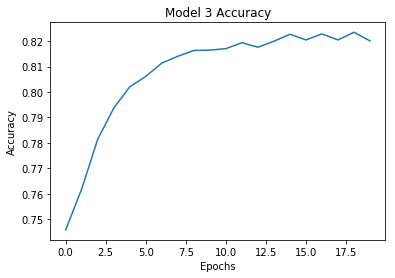

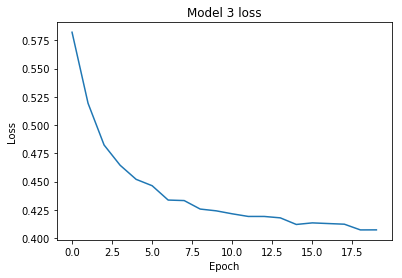


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      5618
           1       0.76      0.52      0.62      1923

   micro avg       0.83      0.83      0.83      7541
   macro avg       0.80      0.73      0.76      7541
weighted avg       0.83      0.83      0.82      7541


 Confusion Matrix 
 [[5299  319]
 [ 926  997]]

 Accuracy: 83.49 %

 F1 Score:  0.755

 Precision:  0.804

 Recall:  0.731

 MCC: 0.53
Time taken by Model 3 :  15.351582765579224 seconds


In [25]:
start = time.time()
model3()
end = time.time()
print("Time taken by Model 3 : ",(end - start),"seconds")
training_time_gpu.append((end - start))

In [26]:
training_time_gpu

[8.595637798309326, 8.472150564193726, 15.351582765579224]